### Problem statement - 1

In [1]:
# Necessary libraries for EDA of dataset
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Model building
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings("ignore")

#### Exploratory Data Analysis

In [2]:
# Loading dataset
data = pd.read_csv(r".\Company_Data.csv")

# Glance of dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#1. Shape of dataset
data.shape

(400, 11)

In [4]:
#2. Technical information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
#3. Dumplicate entries
data.duplicated().sum()

0

In [6]:
#4. Statistical information
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


#### Visualization

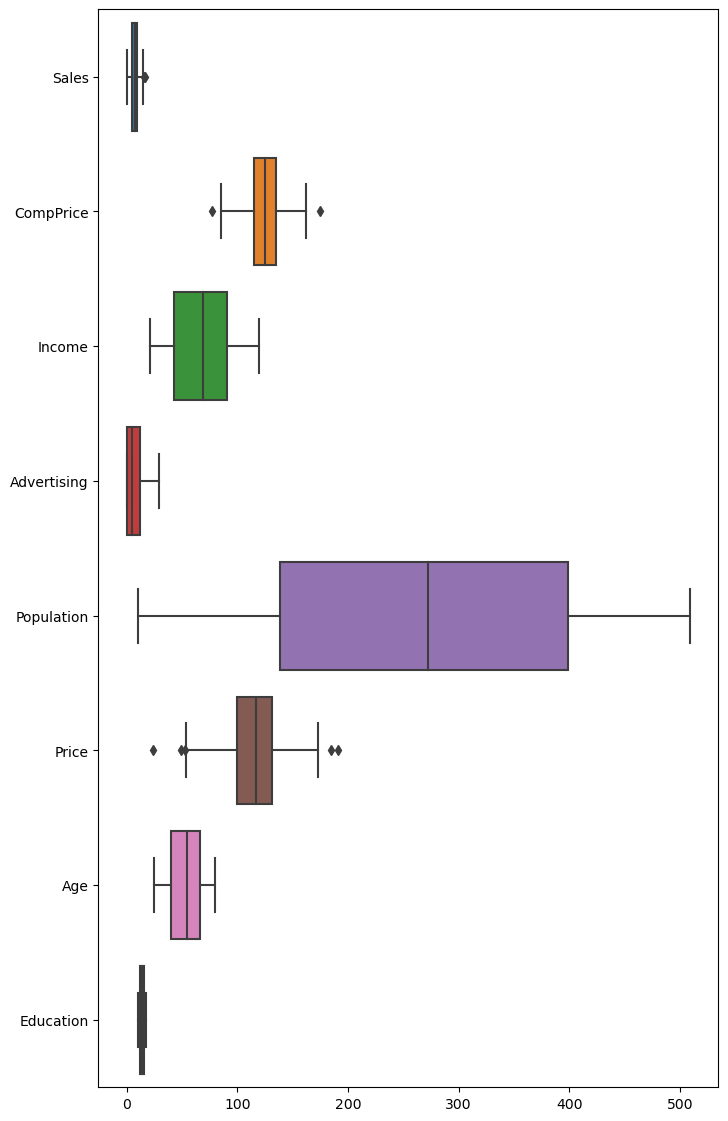

In [7]:
#4. Ouliers in the dataset
plt.figure(figsize=(8, 14))
sns.boxplot(data=data, orient='h')
plt.show()

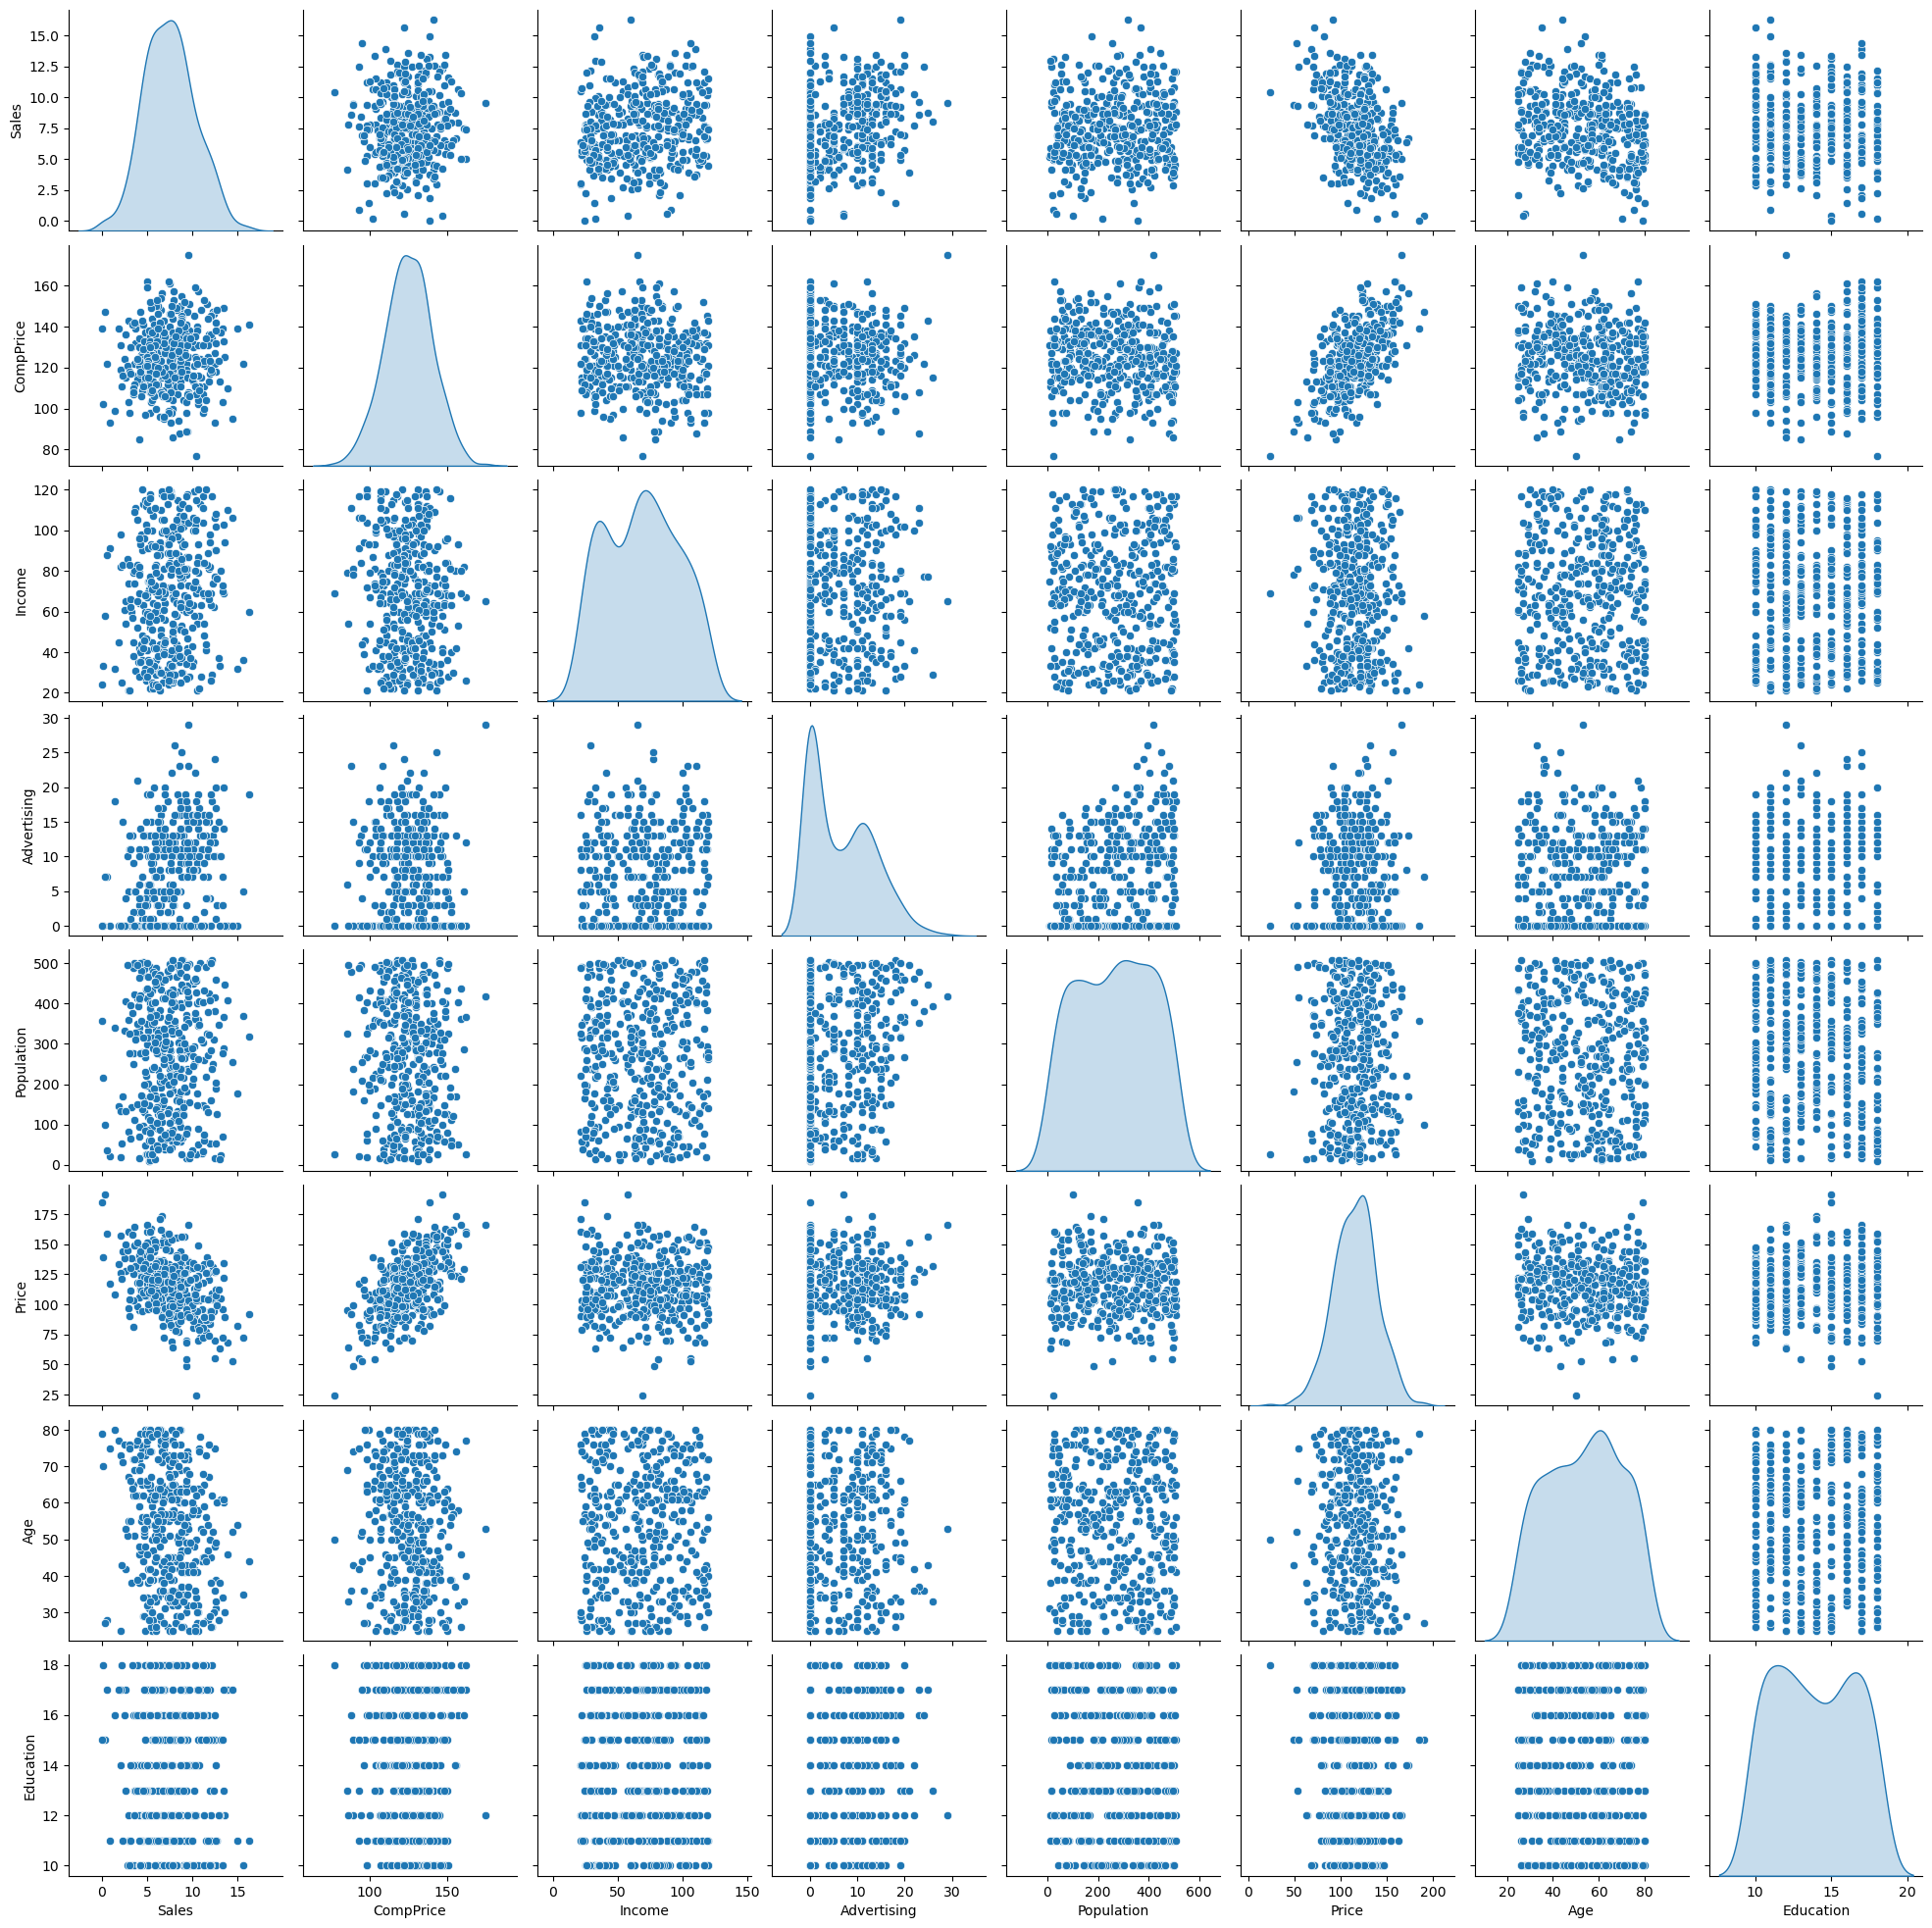

In [8]:
#5. Distribution of dataset - Numeric only
sns.pairplot(data=data, kind='scatter', diag_kind='kde')
plt.show()

In [9]:
# Nature of distribution
data.skew(numeric_only=True)

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [10]:
# Correlation among features
data.corr(numeric_only=True)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


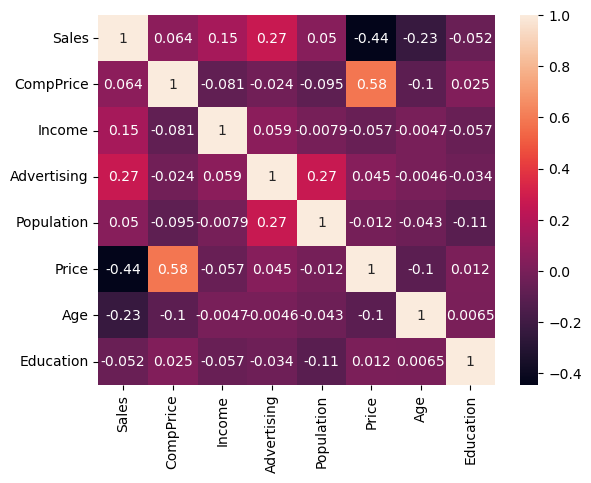

In [11]:
# Visualization of correlation
sns.heatmap(data=data.corr(numeric_only=True), annot=True)
plt.show()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


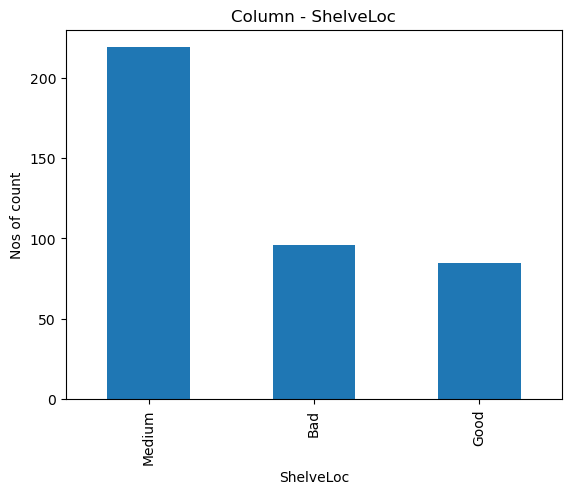

Yes    282
No     118
Name: Urban, dtype: int64


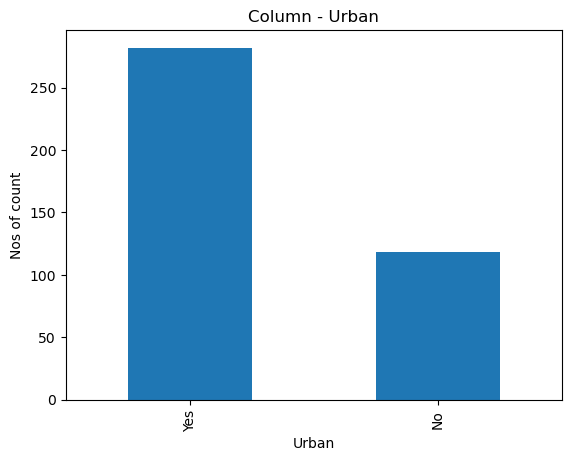

Yes    258
No     142
Name: US, dtype: int64


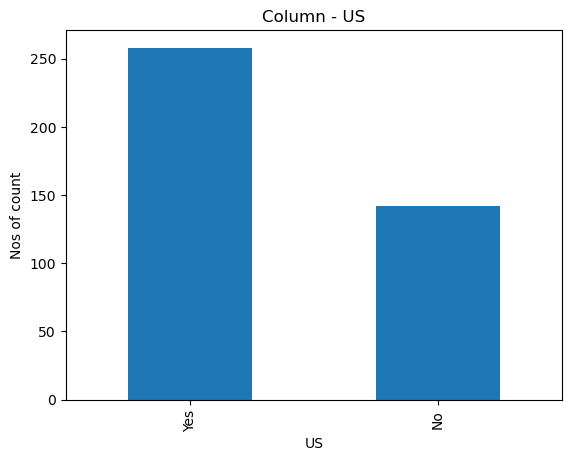

In [12]:
# Non-numeric dataset distribution
for col in ['ShelveLoc', 'Urban', 'US']:
    print(data[col].value_counts())
    data[col].value_counts().plot(kind='bar')
    plt.xlabel(f'{col}')
    plt.ylabel('Nos of count')
    plt.title(f'Column - {col}')
    plt.show()

Observation:
1. Dataset has 400 records and 10 columns.
2. Data types are consistent.
3. No null values and duplicate entries observed.
4. From boxplot, some outliers can be observed.
5. Sales data to be converted to categorical form.
6. Need to convert categorical form of columns to numerical form.

In [13]:
# Conversion of sales data column to categorical form
def sale_category(sales):
    if sales > 10:
        return 'High'
    elif sales > 5:
        return 'Medium'
    else:
        return 'Low'

In [14]:
data['Sales'] = data['Sales'].apply(sale_category)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
data['Sales'].value_counts()

Medium    245
High       78
Low        77
Name: Sales, dtype: int64

In [16]:
# Labeling of categorical data

labeler = LabelEncoder()

for col in ['ShelveLoc', 'Urban', 'US', 'Sales']:
    data[col] = labeler.fit_transform(data[col])

data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


#### Random Forest classifier

In [17]:
# Selection of features
x = data.iloc[:,1:]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [18]:
# Selection of target value
y = data['Sales']
y.head()

0    2
1    0
2    0
3    2
4    1
Name: Sales, dtype: int32

In [19]:
# Splitting of dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=10)

In [20]:
x_train.shape

(300, 10)

In [21]:
x_test.shape

(100, 10)

In [22]:
# Findeing best parameters using hyperparameter tuning

classifier = RandomForestClassifier(random_state=10)
classifier.fit(x_train, y_train)
param_grid = {'n_estimators':[50, 75, 100] ,
              'criterion': ["gini", "entropy", "log_loss"],
              "n_jobs":[3, 5, 7],
              'oob_score': [True, False]
             }

gs = GridSearchCV(classifier, param_grid,cv=5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 75, 100], 'n_jobs': [3, 5, 7],
                         'oob_score': [True, False]})

In [23]:
# Best parameters for the model
gs.best_params_

{'criterion': 'entropy', 'n_estimators': 100, 'n_jobs': 3, 'oob_score': True}

In [24]:
# Best score
gs.best_score_

0.6966666666666667

In [25]:
# Fitting Best Random forest model
classifier = RandomForestClassifier(criterion='entropy', n_estimators = 100, n_jobs = 3, oob_score= True)
classifier.fit(x_train, y_train)
labels = classifier.predict(x_test)
score = accuracy_score(y_test, labels)
cm = confusion_matrix(y_test, labels)
clr = classification_report(y_test, labels)

In [26]:
# Model evaluation values
print('Model accuracy: ', score)
print()
print('Confusion matrix: ')
print(cm)
print()
print('Classification report: ')
print(clr)

Model accuracy:  0.69

Confusion matrix: 
[[ 7  0 15]
 [ 0  4 11]
 [ 1  4 58]]

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.32      0.47        22
           1       0.50      0.27      0.35        15
           2       0.69      0.92      0.79        63

    accuracy                           0.69       100
   macro avg       0.69      0.50      0.53       100
weighted avg       0.70      0.69      0.65       100



In [27]:
# Adding predicted labels to the dataset
predicts = classifier.predict(x)
data['Labels'] = predicts
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Labels
0,2,138,73,11,276,120,0,42,17,1,1,2
1,0,111,48,16,260,83,1,65,10,1,1,0
2,0,113,35,10,269,80,2,59,12,1,1,0
3,2,117,100,4,466,97,2,55,14,1,1,2
4,1,141,64,3,340,128,0,38,13,1,0,1


In [28]:
print('Sales classes', labeler.classes_)
print('Predicted classes', classifier.classes_)

Sales classes ['High' 'Low' 'Medium']
Predicted classes [0 1 2]


### Probelm statement - 2

#### Exploratory Data Analysis

In [29]:
# loading dataset
fraud_df = pd.read_csv(r"D:\Education\Data science\Assignments\15 Random forest\Fraud_check.csv")

# View of dataset
fraud_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [30]:
#1. Shape of dataset
fraud_df.shape

(600, 6)

In [31]:
#2. Renaming columns for consistancy
fraud_df.rename(columns={"Undergrad":"Undergraduate", 
                                    "Marital.Status":"Marital Status", 
                                    "Taxable.Income":"Taxable Income", 
                                    "City.Population":"City Population", 
                                    "Work.Experience":"Work Experience"}, inplace=True)
fraud_df.head()

,Undergraduate,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [32]:
#3. Technical information
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergraduate    600 non-null    object
 1   Marital Status   600 non-null    object
 2   Taxable Income   600 non-null    int64 
 3   City Population  600 non-null    int64 
 4   Work Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [33]:
#4. Duplicate records
fraud_df.duplicated().sum()

0

In [34]:
#5. Statistical information
# Only numerical data
fraud_df.describe()

,Taxable Income,City Population,Work Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [35]:
# Categorical data
fraud_df.describe(exclude=int)

,Undergraduate,Marital Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


#### Visualization

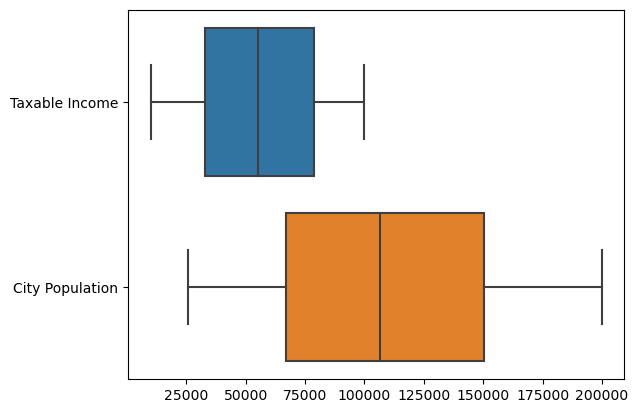

In [36]:
#6. Outliers 
sns.boxplot(fraud_df.drop('Work Experience', axis=1), orient='h')
plt.show()

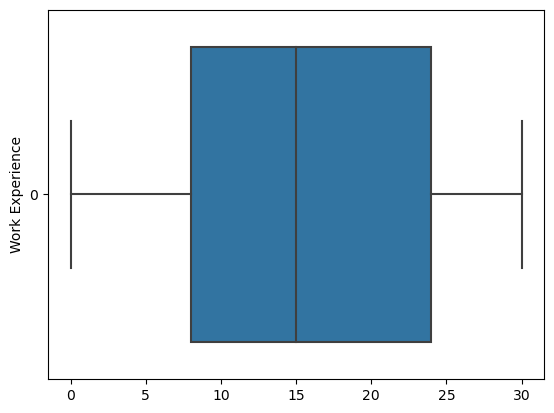

In [37]:
sns.boxplot(fraud_df['Work Experience'], orient='h')
plt.ylabel('Work Experience')
plt.show()

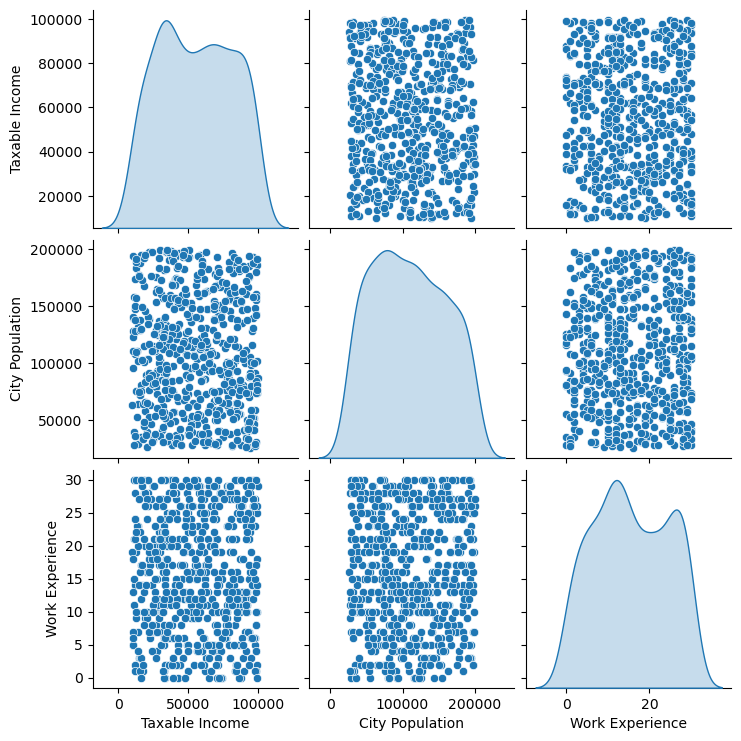

In [38]:
#7. Data distribution
# Numerical data
sns.pairplot(fraud_df, kind='scatter', diag_kind='kde')
plt.show()

YES    312
NO     288
Name: Undergraduate, dtype: int64


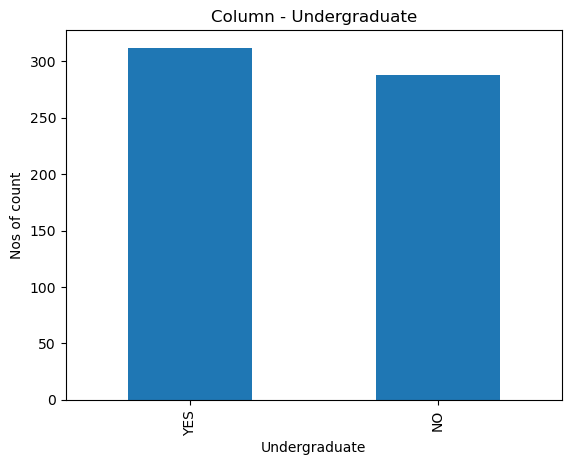

Single      217
Married     194
Divorced    189
Name: Marital Status, dtype: int64


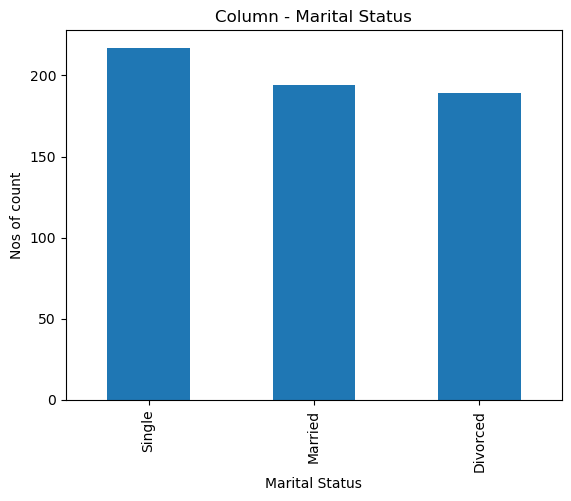

YES    302
NO     298
Name: Urban, dtype: int64


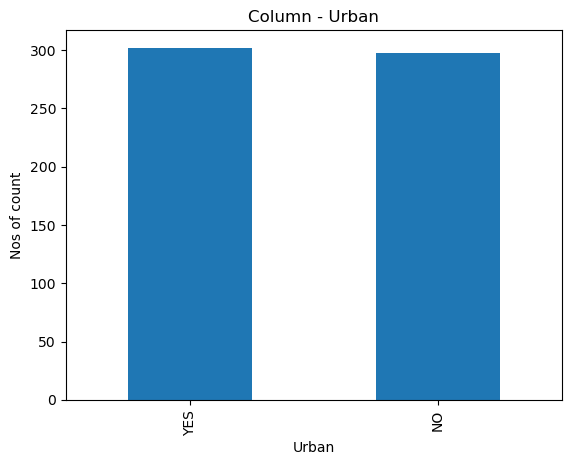

In [39]:
# Non-numeric dataset distribution
for col in ["Undergraduate","Marital Status", "Urban"]:
    print(fraud_df[col].value_counts())
    fraud_df[col].value_counts().plot(kind='bar')
    plt.xlabel(f'{col}')
    plt.ylabel('Nos of count')
    plt.title(f'Column - {col}')
    plt.show()

In [40]:
# Skewness in the dataset
fraud_df.skew(numeric_only=True)

Taxable Income     0.030015
City Population    0.125009
Work Experience    0.018529
dtype: float64

In [41]:
# Correlation among dataset
fraud_df.corr(numeric_only=True)

,Taxable Income,City Population,Work Experience
Taxable Income,1.000000,-0.064387,-0.001818
City Population,-0.064387,1.000000,0.013135
Work Experience,-0.001818,0.013135,1.000000


Observation:
1. Dataset has 600 records and 6 columns.
2. Data types are consistent.
3. No null values and duplicate entries observed.
4. From boxplot, no outliers observed.
5. Taxable income data to be converted to categorical form.
6. Need to convert categorical form of columns to numerical form.

In [42]:
# Conversion of Taxable income to category
fraud_df['Taxable Income'] = fraud_df['Taxable Income'].apply(lambda x: "Risky" if x <= 30000 else "Good")
fraud_df.head()

,Undergraduate,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [43]:
# Conversion of categorical data to numerical form
for colmn in ['Undergraduate', 'Marital Status', 'Urban', 'Taxable Income']:
    fraud_df[colmn] = labeler.fit_transform(fraud_df[colmn])

fraud_df.head()

,Undergraduate,Marital Status,Taxable Income,City Population,Work Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [44]:
# Selection of features and target variables
features = fraud_df.drop('Taxable Income', axis=1)
target = fraud_df['Taxable Income']

In [45]:
# Splitting of dataset
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=0)

#### Random Forest classifier

In [46]:
# Findeing best parameters using hyperparameter tuning

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, Y_train)
param_grid = {'n_estimators':[50, 75, 100] ,
              'criterion': ["gini", "entropy", "log_loss"],
              "n_jobs":[3, 5, 7],
              'oob_score': [True, False]
             }

gs = GridSearchCV(classifier, param_grid,cv=5)
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 75, 100], 'n_jobs': [3, 5, 7],
                         'oob_score': [True, False]})

In [47]:
# Best parameters
gs.best_params_

{'criterion': 'entropy', 'n_estimators': 50, 'n_jobs': 3, 'oob_score': True}

In [48]:
# Best score
gs.best_score_

0.7711111111111111

In [49]:
# Fitting Best Random forest model
classifier = RandomForestClassifier(criterion='entropy', n_estimators = 50, n_jobs = 3, oob_score= True)
classifier.fit(X_train, Y_train)
labels = classifier.predict(X_test)
score = accuracy_score(Y_test, labels)
cm = confusion_matrix(Y_test, labels)
clr = classification_report(Y_test, labels)

In [50]:
# Model evaluation values
print('Model accuracy: ', score)
print()
print('Confusion matrix: ')
print(cm)
print()
print('Classification report: ')
print(clr)

Model accuracy:  0.72

Confusion matrix: 
[[106   7]
 [ 35   2]]

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       113
           1       0.22      0.05      0.09        37

    accuracy                           0.72       150
   macro avg       0.49      0.50      0.46       150
weighted avg       0.62      0.72      0.65       150



In [51]:
# Adding predicted labels to the dataset
predicts = classifier.predict(features)
fraud_df['Class'] = predicts
fraud_df.head()

,Undergraduate,Marital Status,Taxable Income,City Population,Work Experience,Urban,Class
0,0,2,0,50047,10,1,0
1,1,0,0,134075,18,1,0
2,0,1,0,160205,30,1,0
3,1,2,0,193264,15,1,0
4,0,1,0,27533,28,0,0


In [52]:
print('Taxable income classes', labeler.classes_)
print('Predicted classes', classifier.classes_)

Taxable income classes ['Good' 'Risky']
Predicted classes [0 1]
